In [1]:
import random
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from deap import tools, base, creator
import seaborn as sns

sys.path.append("../")
from calculus.term import *
from calculus.strategy import *
from calculus.generation import gen_filtered_lambda_terms

from calculus_utils.drawing import *
from calculus_utils.algorithms import *

from vd_env.lambda_env import LambdaEnv
from vd_env.run_greedy_policy import run_greedy_policy
from vd_env.run_e_greedy_policy import run_e_greedy_policy

In [2]:
UPLIMIT = 60
DOWNLIMIT = 50
LAMBDA_TERM_COUNT = 100
RANDOM_AVERAGE_COUNT = 20

terms, stepsLO = gen_filtered_lambda_terms(
    count_terms=LAMBDA_TERM_COUNT,
    down_vertices_limit=DOWNLIMIT,
    up_vertices_limit=UPLIMIT,
)

countVertices = list(map(lambda term: term.verticesNumber, terms))
countRedexes = list(map(lambda term: len(term.redexes), terms))

print(f"number of lambda terms {len(terms)}")
print("number of vertices= {}".format(countVertices))
print("number of redexes= {}".format(countRedexes))

print("number of steps to normalize using LO strategy= {}".format(stepsLO))
print(f"number of terms with normal form {len(terms)}")

print("number of steps to normalize using LO strategy= {}".format(stepsLO))

stepsRI = [term.normalize(RightmostInnermostStrategy())[1] for term in terms]
print("number of steps to normalize using RI strategy= {}".format(stepsRI))

stepsRand = [
    sum([term.normalize(RandomStrategy())[1] for i in range(RANDOM_AVERAGE_COUNT)])
    / RANDOM_AVERAGE_COUNT
    for term in terms
]
print("number of steps to normalize using Random strategy= {}".format(stepsRand))

Generated terms: 228
LO strategy applying
Remove unormalized terms
Left 100 normalizeble terms
number of lambda terms 100
number of vertices= [53, 51, 57, 56, 56, 56, 56, 56, 59, 51, 51, 51, 55, 57, 51, 52, 52, 59, 57, 55, 59, 52, 52, 53, 51, 53, 56, 57, 53, 55, 57, 56, 54, 59, 52, 57, 52, 58, 55, 53, 57, 53, 51, 59, 53, 54, 51, 54, 55, 57, 56, 51, 53, 51, 52, 58, 51, 58, 57, 52, 57, 52, 54, 52, 57, 57, 54, 52, 58, 52, 58, 57, 58, 58, 52, 53, 51, 59, 57, 56, 55, 51, 59, 55, 55, 53, 51, 52, 53, 55, 51, 52, 51, 55, 54, 56, 54, 56, 58, 57]
number of redexes= [4, 7, 4, 5, 5, 5, 4, 3, 6, 5, 7, 6, 5, 8, 4, 2, 5, 5, 2, 5, 6, 6, 5, 5, 2, 4, 7, 7, 2, 6, 7, 8, 5, 5, 4, 7, 4, 6, 5, 3, 7, 4, 1, 9, 6, 8, 8, 9, 5, 5, 5, 7, 4, 5, 4, 8, 1, 5, 9, 5, 9, 4, 5, 5, 7, 5, 5, 4, 5, 4, 6, 4, 6, 5, 5, 3, 4, 7, 5, 5, 4, 7, 6, 4, 3, 2, 7, 4, 4, 5, 4, 4, 4, 5, 4, 5, 5, 5, 6, 5]
number of steps to normalize using LO strategy= [6, 12, 4, 34, 6, 5, 3, 2, 8, 3, 14, 7, 8, 9, 9, 5, 6, 15, 5, 4, 28, 24, 2, 2, 3, 2, 8, 4

In [3]:
print("max cound LO: {}".format(max(stepsLO)))
print("max cound RI: {}".format(max(stepsRI)))
print("max cound Rand: {}".format(max(stepsRand)))

max cound LO: 72
max cound RI: inf
max cound Rand: inf


In [7]:
max_count_steps_rlenv = 100
strategies_env = [LeftmostOutermostStrategy(), RightmostInnermostStrategy()]

explore_actions = 100
epsilon = 0.1

In [8]:
lambda_env = LambdaEnv(
    strategies=strategies_env,
    lambda_terms=terms,
    max_step_term=max_count_steps_rlenv,
    count_terms=LAMBDA_TERM_COUNT,
)

In [9]:
lambda_env, rewards_e_greedy = run_e_greedy_policy(
    lambda_env,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=True,
    is_action_based=True,
)

In [10]:
lambda_env.reset_soft()
lambda_env, rewards_e_greedy_non_d = run_e_greedy_policy(
    lambda_env,
    exploration=explore_actions,
    max_term_reward=max_count_steps_rlenv,
    epsilon=epsilon,
    deterministic=False,
    is_action_based=True,
)

In [11]:
steps_e_greedy = [max_count_steps_rlenv - rew for rew in rewards_e_greedy]
steps_e_greedy_non_d = [max_count_steps_rlenv - rew for rew in rewards_e_greedy_non_d]

In [12]:
print("count steps to norm by e-Greedy policy = {}".format(steps_e_greedy))
print(
    "count steps to norm by e-Greedy policy non det = {}".format(steps_e_greedy_non_d)
)

count steps to norm by e-Greedy policy = [6, 12, 5, 41, 8, 5, 4, 3, 6, 6, 15, 8, 9, 10, 9, 5, 10, 6, 5, 5, 39, 15, 5, 5, 3, 4, 8, 10, 2, 10, 9, 22, 6, 10, 4, 7, 5, 8, 19, 99, 7, 5, 1, 22, 8, 11, 8, 18, 14, 15, 7, 20, 4, 5, 14, 9, 1, 6, 10, 5, 11, 4, 13, 6, 8, 29, 8, 4, 5, 5, 6, 4, 9, 22, 6, 7, 9, 9, 17, 12, 5, 8, 8, 7, 11, 2, 8, 4, 5, 15, 5, 9, 4, 18, 4, 12, 6, 5, 8, 10]
count steps to norm by e-Greedy policy non det = [6, 12, 5, 41, 8, 5, 4, 3, 6, 6, 15, 8, 9, 10, 7, 5, 10, 15, 5, 4, 31, 25, 5, 5, 3, 4, 8, 5, 2, 8, 2, 23, 6, 10, 4, 7, 5, 7, 14, 20, 4, 6, 1, 22, 5, 11, 3, 19, 19, 47, 5, 20, 4, 5, 10, 9, 1, 7, 10, 5, 10, 2, 26, 4, 2, 49, 1, 6, 7, 5, 3, 4, 5, 11, 3, 9, 9, 5, 30, 12, 2, 5, 8, 7, 12, 2, 5, 4, 5, 13, 1, 9, 4, 24, 4, 2, 6, 9, 10, 10]


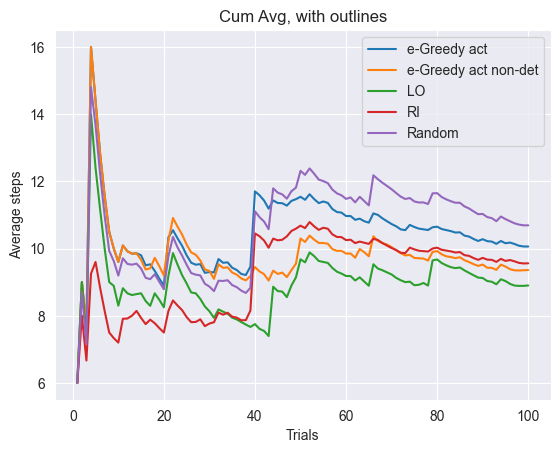

In [13]:
comp_data = {
    "e-Greedy act": (steps_e_greedy, "-"),
    "e-Greedy act non-det": (steps_e_greedy_non_d, "-"),
    "LO": (stepsLO, "-"),
    "RI": ([step if step != np.inf else 100 for step in stepsRI], "-"),
    "Random": ([step if step != np.inf else 100 for step in stepsRand], "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Cum Avg, with outlines")

# remove outlines based on IQR

In [52]:
from scipy.stats import iqr
import collections


def q1(x, axis=None):
    return np.percentile(x, 25, axis=axis)


def q3(x, axis=None):
    return np.percentile(x, 95, axis=axis)


def iqr_outlier(x, axis=None, bar=1.5, side="both"):
    assert side in ["gt", "lt", "both"], "Side should be `gt`, `lt` or `both`."

    d_iqr = iqr(x, axis=axis)
    d_q1 = q1(x, axis=axis)
    d_q3 = q3(x, axis=axis)
    iqr_distance = np.multiply(d_iqr, bar)

    stat_shape = list(x.shape)

    if isinstance(axis, collections.Iterable):
        for single_axis in axis:
            stat_shape[single_axis] = 1
    else:
        stat_shape[axis] = 1

    if side in ["gt", "both"]:
        upper_range = d_q3 + iqr_distance
        upper_outlier = np.greater(x - upper_range.reshape(stat_shape), 0)
    if side in ["lt", "both"]:
        lower_range = d_q1 - iqr_distance
        lower_outlier = np.less(x - lower_range.reshape(stat_shape), 0)

    result = []
    if side == "gt":
        result = upper_outlier
    if side == "lt":
        result = lower_outlier
    if side == "both":
        result = np.logical_or(upper_outlier, lower_outlier)

    result = [False if res else True for res in result]
    return result

In [53]:
stepsLO = np.array(stepsLO)
stepsRI = np.array(stepsRI)
stepsRand = np.array(stepsRand)
steps_e_greedy = np.array(steps_e_greedy)
steps_e_greedy_non_d = np.array(steps_e_greedy_non_d)

stepsLO_iqr = stepsLO[iqr_outlier(x=stepsLO, axis=0, side="gt")]
stepsRI_iqr = stepsRI[iqr_outlier(x=stepsRI, axis=0, side="gt")]
stepsRand_iqr = stepsRand[iqr_outlier(x=stepsRand, axis=0, side="gt")]
steps_eg_iqr = steps_e_greedy[iqr_outlier(x=steps_e_greedy, axis=0, side="gt")]
steps_eg_non_iqr = steps_e_greedy_non_d[
    iqr_outlier(x=steps_e_greedy_non_d, axis=0, side="gt")
]

In [54]:
print("After IQR len of steps arrays")
print(f"LO: {len(stepsLO_iqr)}")
print(f"RI: {len(stepsRI_iqr)}")
print(f"Rand: {len(stepsRand_iqr)}")
print(f"eG: {len(steps_eg_iqr)}")
print(f"eGn: {len(steps_eg_non_iqr)}")

After IQR len of steps arrays
LO: 97
RI: 99
Rand: 97
eG: 97
eGn: 97


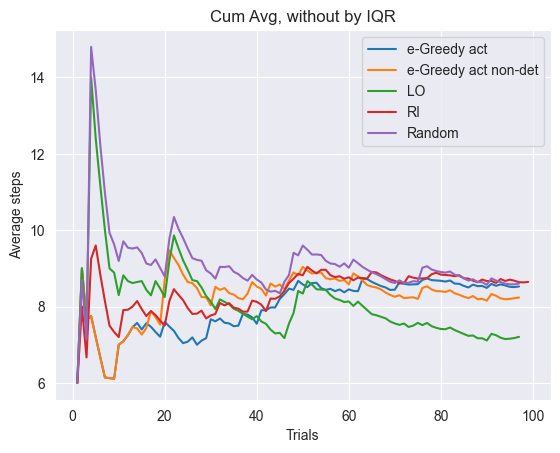

In [55]:
comp_data = {
    "e-Greedy act": (steps_eg_iqr, "-"),
    "e-Greedy act non-det": (steps_eg_non_iqr, "-"),
    "LO": (stepsLO_iqr, "-"),
    "RI": (stepsRI_iqr, "-"),
    "Random": (stepsRand_iqr, "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Cum Avg, without by IQR")

# Z score based method

In [43]:
import scipy.stats as stat


def sd_outlier(x, axis=None, bar=3, side="both"):
    assert side in ["gt", "lt", "both"], "Side should be `gt`, `lt` or `both`."

    d_z = stat.zscore(x, axis=axis)

    if side == "gt":
        result = d_z > bar
    elif side == "lt":
        result = d_z < -bar
    elif side == "both":
        result = np.abs(d_z) > bar

    result = [False if res else True for res in result]
    return result

In [56]:
stepsRI_ = np.array([step if step != np.inf else 200 for step in stepsRI])
stepsRand_ = np.array([step if step != np.inf else 200 for step in stepsRand])

stepsLO_z = stepsLO[sd_outlier(x=stepsLO, axis=0, side="gt")]
stepsRI_z = stepsRI_[sd_outlier(x=stepsRI_, axis=0, side="gt")]
stepsRand_z = stepsRand_[sd_outlier(x=stepsRand_, axis=0, side="gt")]
steps_eg_z = steps_e_greedy[sd_outlier(x=steps_e_greedy, axis=0, side="gt")]
steps_eg_non_z = steps_e_greedy_non_d[
    sd_outlier(x=steps_e_greedy_non_d, axis=0, side="gt")
]

In [57]:
print("After Z-score len of steps arrays")
print(f"LO: {len(stepsLO_z)}")
print(f"RI: {len(stepsRI_z)}")
print(f"Rand: {len(stepsRand_z)}")
print(f"eG: {len(steps_eg_z)}")
print(f"eGn: {len(steps_eg_non_z)}")

After Z-score len of steps arrays
LO: 97
RI: 99
Rand: 99
eG: 99
eGn: 97


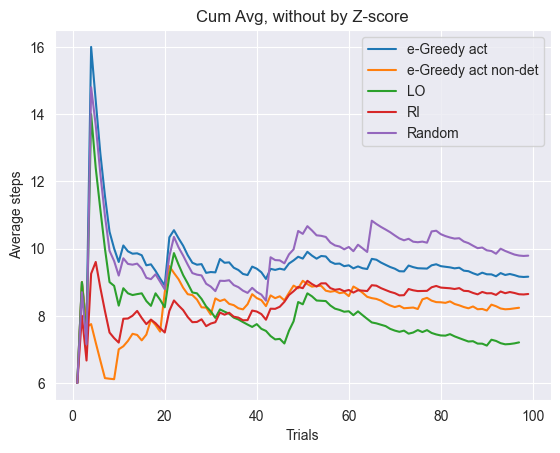

In [58]:
comp_data = {
    "e-Greedy act": (steps_eg_z, "-"),
    "e-Greedy act non-det": (steps_eg_non_z, "-"),
    "LO": (stepsLO_z, "-"),
    "RI": (stepsRI_z, "-"),
    "Random": (stepsRand_z, "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Cum Avg, without by Z-score")

In [63]:
def get_outliers(x, axis=None, bar=1.5):
    d_iqr = iqr(x, axis=axis)
    d_q3 = np.percentile(x, 95, axis=axis)
    iqr_distance = np.multiply(d_iqr, bar)

    stat_shape = list(x.shape)
    stat_shape[axis] = 1

    upper_range = d_q3 + iqr_distance
    upper_outlier = np.greater(x - upper_range.reshape(stat_shape), 0)

    return [False if res else True for res in upper_outlier]

In [64]:
stepsLO_iqr = stepsLO[get_outliers(x=stepsLO, axis=0)]
stepsRI_iqr = stepsRI[get_outliers(x=stepsRI, axis=0)]
stepsRand_iqr = stepsRand[get_outliers(x=stepsRand, axis=0)]
steps_eg_iqr = steps_e_greedy[get_outliers(x=steps_e_greedy, axis=0)]
steps_eg_non_iqr = steps_e_greedy_non_d[get_outliers(x=steps_e_greedy_non_d, axis=0)]

In [65]:
print("After IQR len of steps arrays")
print(f"LO: {len(stepsLO_iqr)}")
print(f"RI: {len(stepsRI_iqr)}")
print(f"Rand: {len(stepsRand_iqr)}")
print(f"eG: {len(steps_eg_iqr)}")
print(f"eGn: {len(steps_eg_non_iqr)}")

After IQR len of steps arrays
LO: 97
RI: 99
Rand: 97
eG: 97
eGn: 97


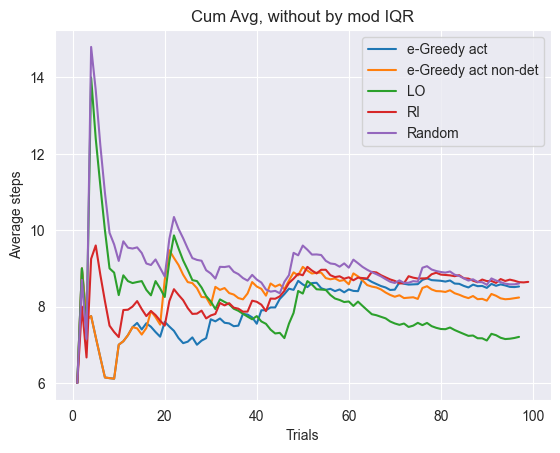

In [66]:
comp_data = {
    "e-Greedy act": (steps_eg_iqr, "-"),
    "e-Greedy act non-det": (steps_eg_non_iqr, "-"),
    "LO": (stepsLO_iqr, "-"),
    "RI": (stepsRI_iqr, "-"),
    "Random": (stepsRand_iqr, "-"),
}

draw_cumulative_avg_comparison(comp_data, title="Cum Avg, without by mod IQR")

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.87it/s]


number of not normalized terms: 0
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm          0.610757  869.656978 -496.007052     inf      0.103794   
gamma            0.621981  865.879280 -494.186150     inf      0.131947   
rayleigh         0.644906  902.692668 -495.171774     inf      0.224230   
norm             0.665120  923.002442 -492.085403     inf      0.210575   
exponpow         0.679932  798.389994 -485.277815     inf      0.197095   

          ks_pvalue  
lognorm    0.216016  
gamma      0.055966  
rayleigh   0.000067  
norm       0.000228  
exponpow   0.000703  
{'lognorm': {'s': 0.6104518250882873, 'loc': -0.21418762792599438, 'scale': 7.891088558282213}}
Norm distribution: (9.35, 6.638335634780754)


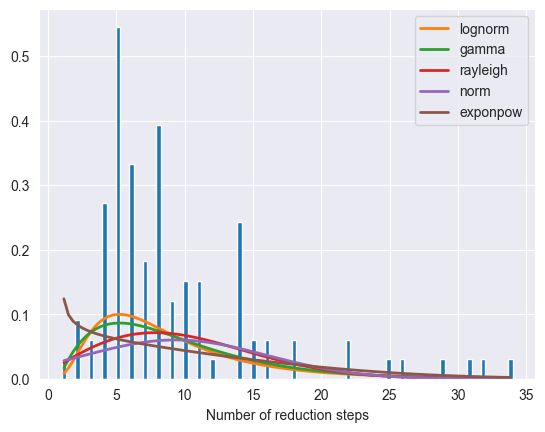

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 24.25it/s]

Log Norm distribution params: (2.0322387640957436, 0.6316574128653067); expected value = 9.316008903188958


In [12]:
draw_hist(steps_e_greedy)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.63it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.123652  1080.410115 -655.730096     inf      0.100254   
gamma            0.134963  1081.846420 -646.977231     inf      0.137312   
chi2             0.145261  1046.161623 -639.623804     inf      0.170721   
exponpow         0.150650   963.824646 -635.981003     inf      0.217482   
rayleigh         0.152434  1223.418302 -639.409259     inf      0.291506   

             ks_pvalue  
lognorm   2.501012e-01  
gamma     4.170030e-02  
chi2      5.113445e-03  
exponpow  1.241634e-04  
rayleigh  5.066643e-08  
{'lognorm': {'s': 0.8557784388644093, 'loc': 0.1937480056935801, 'scale': 6.784285670884218}}
Norm distribution: (10.13, 10.585513686165635)


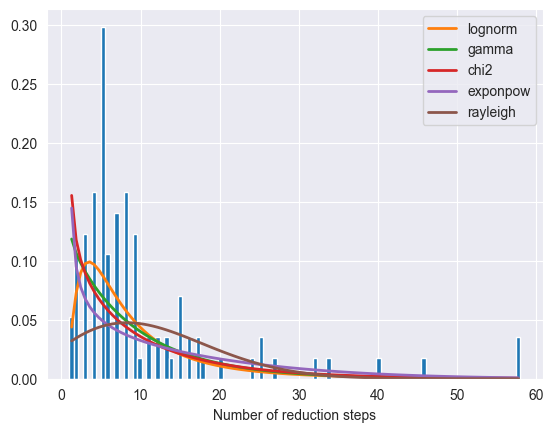

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 30.96it/s]

Log Norm distribution params: (1.9540884638613456, 0.8235294196029258); expected value = 9.906477304085255


In [13]:
draw_hist(steps_e_greedy_non_d)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 28.46it/s]


number of not normalized terms: 0
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.009172  1708.119850 -915.860480     inf      0.121446   
chi2             0.021610  1313.681897 -830.160993     inf      0.407199   
exponpow         0.023774  1239.741056 -820.618479     inf      0.341813   
rayleigh         0.031041  2922.747955 -798.550560     inf      0.379787   
gamma            0.033124  2774.259605 -787.450738     inf      0.786390   

             ks_pvalue  
lognorm   9.621647e-02  
chi2      1.684057e-15  
exponpow  6.209271e-11  
rayleigh  1.787303e-13  
gamma     2.764798e-66  
{'lognorm': {'s': 1.05808688052961, 'loc': 0.5453871759224, 'scale': 5.268537039286333}}
Norm distribution: (10.89, 21.025173007611617)


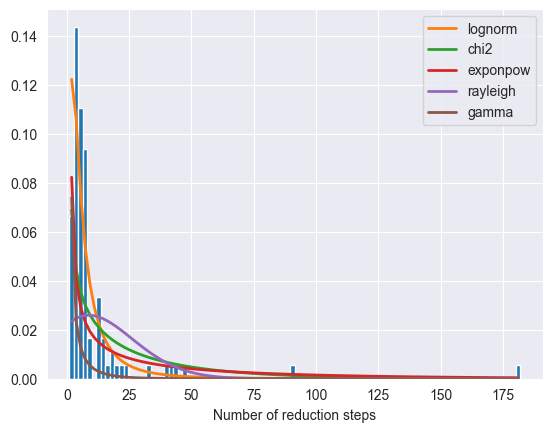

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 34.59it/s]

Log Norm distribution params: (1.8108038087663807, 0.9277771173342897); expected value = 9.404506586558812


In [14]:
draw_hist(stepsLO)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.64it/s]


number of not normalized terms: 0
          sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm          0.734600  848.291820 -477.544368     inf      0.093606   
gamma            0.741790  850.348485 -476.570429     inf      0.112721   
rayleigh         0.757745  886.445887 -479.047561     inf      0.177719   
norm             0.777804  924.768463 -476.434691     inf      0.181860   
powerlaw         0.858349  705.299229 -461.975952     inf      0.289492   

             ks_pvalue  
lognorm   3.245007e-01  
gamma     1.458289e-01  
rayleigh  3.107279e-03  
norm      2.291950e-03  
powerlaw  6.468433e-08  
{'lognorm': {'s': 0.5041159557222974, 'loc': -0.8932667069826657, 'scale': 8.821701151857534}}
Norm distribution: (9.15, 5.564845011318824)


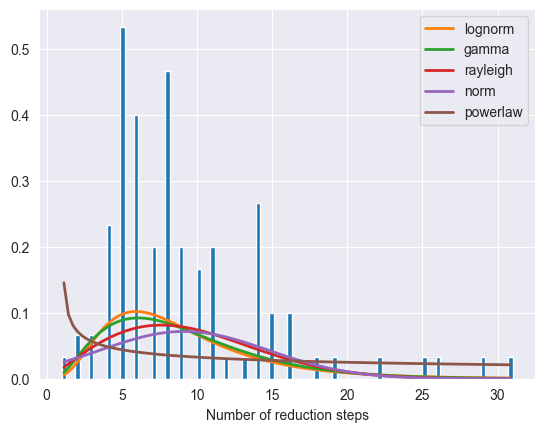

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 25.88it/s]

Log Norm distribution params: (2.0521932674158476, 0.5753110122425752); expected value = 9.18603731283647


In [15]:
draw_hist(stepsRI)

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 26.75it/s]


number of not normalized terms: 1
          sumsquare_error          aic         bic  kl_div  ks_statistic  \
lognorm          0.037753  1063.982693 -765.522916     inf      0.100777   
rayleigh         0.076965  1191.121223 -699.602845     inf      0.276246   
exponpow         0.081451   998.488184 -689.398636     inf      0.175484   
norm             0.089464  1204.590847 -684.704719     inf      0.241829   
powerlaw         0.111944   844.317172 -657.917124     inf      0.305959   

             ks_pvalue  
lognorm   2.498343e-01  
rayleigh  3.601202e-07  
exponpow  3.884871e-03  
norm      1.396997e-05  
powerlaw  1.006882e-08  
{'lognorm': {'s': 0.7784183632739295, 'loc': 0.4238845157256429, 'scale': 6.913800426046649}}
Norm distribution: (10.022222222222222, 9.597643392942457)


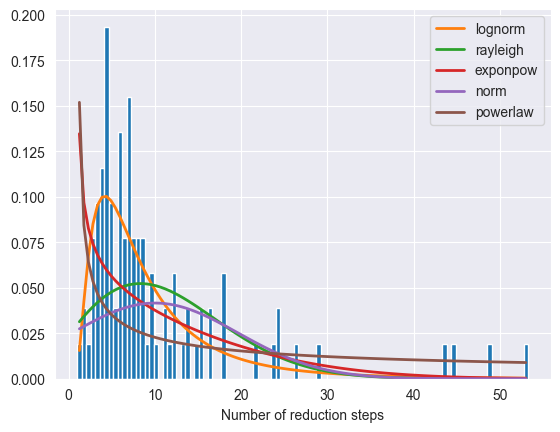

Fitting 8 distributions: 100%|██████████| 8/8 [00:00<00:00, 35.55it/s]

Log Norm distribution params: (2.010390218353626, 0.724557285126096); expected value = 9.707335609195301


In [16]:
draw_hist(stepsRand)